In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core.multiarray failed to import

ImportError: numpy.core.umath failed to import

ImportError: numpy.core.umath failed to import

AttributeError: module 'numpy' has no attribute 'integer'

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from time import time
np.random.seed(7)
dataset = np.loadtxt("datasets/pima-indians-diabetes.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]
#print(X)
#print(Y)

AttributeError: module 'numpy' has no attribute 'dtype'

In [13]:
# create model
seed = 0
np.random.seed(seed)
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
# Compile model
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
print("FITTING")
history = model.fit(X, Y, epochs=120,batch_size=20,validation_split=0.20,verbose=2,callbacks=[tensorboard])
print("END FITTING")


FITTING
Train on 614 samples, validate on 154 samples
Epoch 1/120
 - 0s - loss: 0.6030 - acc: 0.7020 - val_loss: 0.6079 - val_acc: 0.6623
Epoch 2/120
 - 0s - loss: 0.5984 - acc: 0.6987 - val_loss: 0.6067 - val_acc: 0.6688
Epoch 3/120
 - 0s - loss: 0.5896 - acc: 0.7052 - val_loss: 0.6043 - val_acc: 0.6688
Epoch 4/120
 - 0s - loss: 0.6047 - acc: 0.7052 - val_loss: 0.6084 - val_acc: 0.6753
Epoch 5/120
 - 0s - loss: 0.5966 - acc: 0.7003 - val_loss: 0.6059 - val_acc: 0.6753
Epoch 6/120
 - 0s - loss: 0.6065 - acc: 0.7052 - val_loss: 0.6080 - val_acc: 0.6688
Epoch 7/120
 - 0s - loss: 0.5930 - acc: 0.7068 - val_loss: 0.6039 - val_acc: 0.6623
Epoch 8/120
 - 0s - loss: 0.6086 - acc: 0.6906 - val_loss: 0.6083 - val_acc: 0.6688
Epoch 9/120
 - 0s - loss: 0.5995 - acc: 0.6971 - val_loss: 0.6028 - val_acc: 0.6623
Epoch 10/120
 - 0s - loss: 0.6029 - acc: 0.6954 - val_loss: 0.6058 - val_acc: 0.6688
Epoch 11/120
 - 0s - loss: 0.6104 - acc: 0.6954 - val_loss: 0.6048 - val_acc: 0.6623
Epoch 12/120
 - 0s -

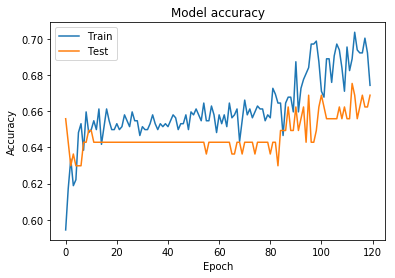

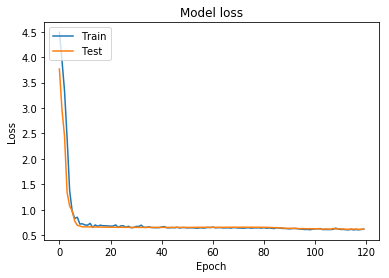

In [4]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [5]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
predictions = model.predict(X)
# round predictions
for a,b in zip(X,predictions):
   print(a,round(b[0]))

768/768 [==============================] - 0s 29us/step

acc: 68.10%
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ] 0.0
[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ] 0.0
[  8.    183.     64.      0.      0.     23.3     0.672  32.   ] 0.0
[ 1.    89.    66.    23.    94.    28.1    0.167 21.   ] 0.0
[  0.    137.     40.     35.    168.     43.1     2.288  33.   ] 0.0
[  5.    116.     74.      0.      0.     25.6     0.201  30.   ] 0.0
[ 3.    78.    50.    32.    88.    31.     0.248 26.   ] 0.0
[ 10.    115.      0.      0.      0.     35.3     0.134  29.   ] 1.0
[2.00e+00 1.97e+02 7.00e+01 4.50e+01 5.43e+02 3.05e+01 1.58e-01 5.30e+01] 1.0
[  8.    125.     96.      0.      0.      0.      0.232  54.   ] 0.0
[  4.    110.     92.      0.      0.     37.6     0.191  30.   ] 0.0
[ 10.    168.     74.      0.      0.     38.      0.537  34.   ] 0.0
[ 10.    139.     80.      0.      0.     27.1     1.441  57.   ] 0.0
[1.00e+00 1.89e+02 6.00e+01 2.30e+01 